In [2]:
import pandas as pd
import numpy as np
import matplotlib
import statistics

In [3]:
csv_path = 'cleaned_data_sample.csv'
df = pd.read_csv(csv_path, index_col='id')
df

,name,gender,paid,isFiliated,state,date,plan
id,,,,,,,
1,Goofy Payne,Não-binário,623.73,True,SC,04-01-2024,Pro
2,Zen Mccarthy,Não-binário,827.08,False,PB,18-04-2021,Standard
3,Inspiring Hofstadter,Masculino,480.45,False,PI,05-01-2020,Free
4,Focused Gauss,Não-binário,623.07,True,PI,01-05-2020,Pro
5,Ecstatic Kilby,Masculino,813.21,False,GO,18-02-2022,Standard
...,...,...,...,...,...,...,...
996,Adoring Pasteur,Masculino,437.81,False,PA,30-11-2023,Free
997,Heuristic Cori,Masculino,539.48,True,PB,21-09-2024,Pro
998,Loving Cannon,Feminino,907.96,False,MS,03-06-2023,Standard


In [4]:
# A média da soma de todos os pagamentos
media = df['paid'].mean()
# statistics.mean(df['paid']) # Outra forma de calcular a média

# A mediana da soma de todos os pagamentos organizados
mediana = df['paid'].sort_values(ascending=False).median()
# statistics.median(df['paid']) # Outra forma de calcular a mediana

# A moda do estado, quanto um estado aparece mais vezes
stateModa = df['state'].mode()
# statistics.mode(df['state']) # Outra forma de calcular a moda

<AxesSubplot:title={'center':'Histograma de pagamentos'}, ylabel='Frequency'>

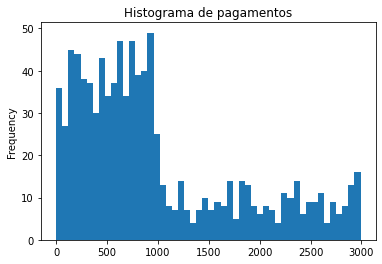

In [5]:
# Analisar a tendência de pagamentos baseada no histograma de valores pagos
df['paid'].plot(kind='hist', bins=50, title='Histograma de pagamentos')

In [39]:
# Convertendo formato de data para datetime, assim podemos fazer comparações de datas
df['date'] = pd.to_datetime(df['date'], format='%D/%M/%Y', infer_datetime_format=True)

# Pegando todos os pagamentos realizados em 2024
df2024 = df.loc[
    (df['date'] >= '01-01-2024')
    & 
    (df['date'] <= '31-12-2024')
]

# Calculando a média e o desvio padrão dos pagamentos realizados em 2024
mean2024 = df2024['paid'].mean()
std2024 = df2024['paid'].std()

/home/real/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:52: UserWarning: Parsing '31-12-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


,name,gender,paid,isFiliated,state,date,plan
id,,,,,,,
541,Interesting Tereshkova,Feminino,2585.35,False,SP,2024-11-16,Pro
310,Nervous Mirzakhani,Feminino,2709.81,True,RJ,2024-11-12,Premium
362,Beautiful Meitner,Masculino,2944.91,False,PI,2024-10-18,Pro
686,Nice Hypatia,Feminino,2945.13,True,TO,2024-10-10,Premium
183,Youthful Cerf,Feminino,2803.42,False,BA,2024-09-04,Pro
92,Affectionate Tharp,Feminino,2956.63,False,CE,2024-08-06,Pro
419,Trusting Mendel,Feminino,2975.24,False,PE,2024-07-29,Pro
482,Dreamy Roentgen,Feminino,2968.62,False,BA,2024-06-28,Pro
175,Vibrant Meitner,Feminino,2890.78,False,PB,2024-06-03,Pro


<AxesSubplot:title={'center':'Pagamentos realizados em 2024'}, xlabel='date'>

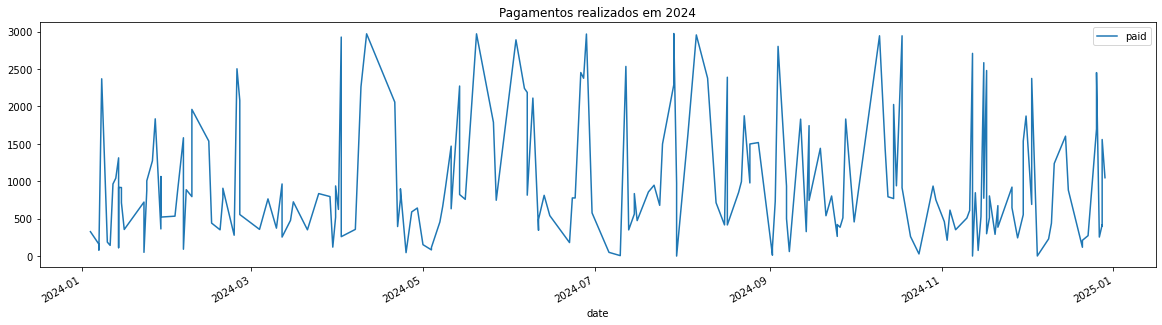

In [54]:
df2024.plot(x='date', y='paid', kind='line', title='Pagamentos realizados em 2024', figsize=(20, 5))

In [58]:
# Pagamentos que estão fora do padrão
df2024off = df2024.loc[
    df2024['paid'] > mean2024 + 2*std2024
]

# Ordenando os pagamentos fora do padrão por data
df2024off.sort_values(by='date', ascending=False)

InvalidIndexError: (slice(0, -1, 1), slice(0, 3, 1))

<AxesSubplot:title={'center':'Pagamentos fora do padrão por gênero'}>

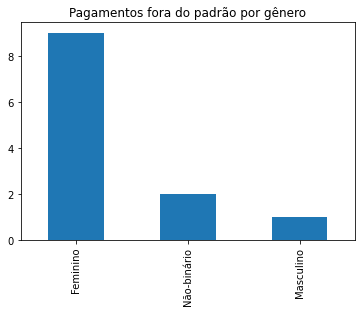

In [40]:
# Contando quantos pagamentos fora do padrão foram realizados por gênero
byGender2024Off = df2024off['gender'].value_counts()

# Plotando o gráfico de barras
byGender2024Off.plot(kind='bar',title='Pagamentos fora do padrão por gênero')

<AxesSubplot:>

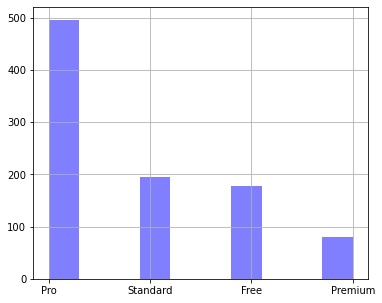

In [7]:
# Analisar a tendência dos planos baseado no histograma de planos obtidos
df['plan'].hist(figsize=(6, 5), bins=10, color='blue', alpha=0.5)

<AxesSubplot:title={'center':'Estados com mais registros'}, xlabel='Estados', ylabel='Quantidade de registros'>

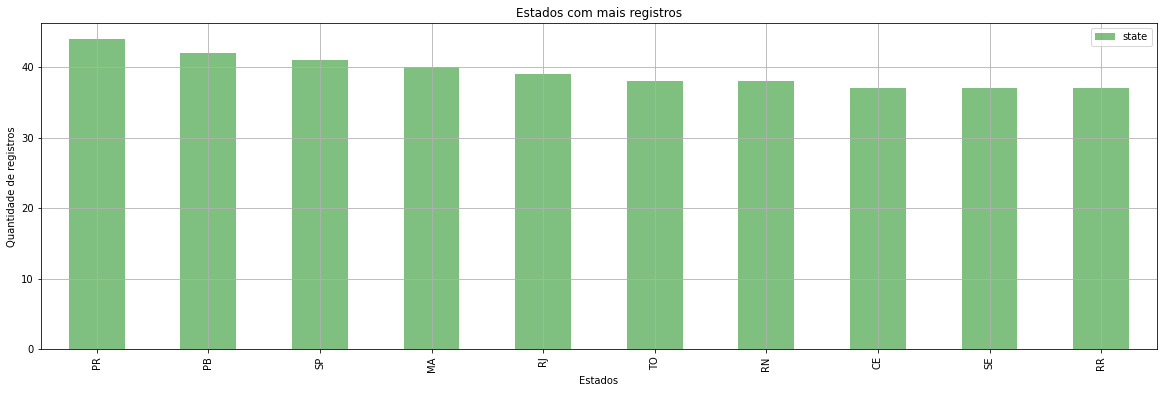

In [8]:
# Analisar a quantidade de pessoas pagantes por estado em um gráfico de barras
states = df['state'].value_counts().head(10)

states.plot(kind='bar', figsize=(20, 6), color='green', alpha=0.5,legend=True, title='Estados com mais registros', ylabel='Quantidade de registros', xlabel='Estados', grid=True)

In [9]:
# Aqui nós calculamos as medias e desvios padrões dos pagamentos
meanPaid = statistics.mean(df['paid']) # Média
# df['paid'].mean() # Outra forma de calcular a média

deviancePaid = statistics.stdev(df['paid']) # Desvio padrão
# df['paid'].std() # Outra forma de calcular o desvio padrão

In [10]:
# Aqui vemos a média e o desvio padrão dos pagamentos, mostrando os números
# que estão dentro dos resultados usuais e padrões
meanPaid - deviancePaid, meanPaid + deviancePaid


(179.54922803142927, 1796.8913187614203)

In [11]:
# Aqui vemos o desvio padrão relacionado a anomalias, mostrando os números
# que estão fora dos resultados usuais e padrões
meanPaid - 2 * deviancePaid, meanPaid + 2 * deviancePaid

(-629.1218173335662, 2605.5623641264156)

In [12]:
# Aqui descrevemos o dataframe, mostrando a média, desvio padrão, mínimo, máximo
df.describe()

,paid
count,951.000000
mean,988.220273
std,808.671045
min,0.010000
25%,387.040000
50%,746.550000
75%,1439.795000
max,2990.800000


In [13]:
# Serve para correlacionar valores, como a tabela atual não possui nenhuma
# correlação, ficara aqui para fins de conhecimento
# pd.DataFrame.corr

In [14]:
# CSV with Null
csv_path_null = 'data_sample.csv'
df_null = pd.read_csv(csv_path_null, index_col='id')

# Aqui vemos a quantidade de valores nulos em porcentagem
df_null.isna().sum() / len(df_null) * 100

name          0.0
gender        0.0
paid          4.9
isFiliated    0.0
state         0.0
date          0.0
dtype: float64